# SEM MRes 2021 
## 02-ASE-GPAW-EffectiveMass

OK! In this notebook we are going to use as our starting point the LCAO calculation from the previous work, but now go and calculate the effective mass by 'hand' from inspecting the eigenenergies returned by the band structure calculation. 

In [1]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [2]:
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import read
from ase.build import bulk
from ase.optimize import BFGS
from ase.optimize import BFGSLineSearch
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
from ase.dft.dos import DOS
from ase.constraints import UnitCellFilter
from ase.build import mx2
from gpaw import *
from ase.constraints import StrainFilter
from gpaw.xc.vdw import VDWFunctional
vdw = VDWFunctional('vdW-DF2', Nalpha=24)

atoms=read('WSWSe.traj')
calc = GPAW(mode=PW(600),
            xc='vdW-DF2',
            nbands=70,
            convergence={'bands': -20},
            setups={'W': '6'},      
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.01),
            kpts={'size': (42, 42, 1), 'gamma': True})  
atoms.calc = calc
atoms.get_potential_energy()
calc.write('gs_new.gpw', mode='all')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.0
 |___|_|             

User:   tewodros@tewodros-HP-Pavilion-Laptop-14-bf0xx
Date:   Sat May 17 01:20:19 2025
Arch:   x86_64
Pid:    7344
CWD:    /home/tewodros/Desktop/Hetrostructure/HTR/revised/HTR/1T_2H/WS2-WSe2
Python: 3.7.12
gpaw:   /home/tewodros/miniconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/tewodros/miniconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/tewodros/miniconda3/lib/python3.7/site-packages/ase (version 3.22.1)
numpy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/numpy (version 1.21.6)
scipy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/scipy (version 1.7.3)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: -20}
  kpts: {gamma: True,
         size: (42, 42, 1)}
  mode: {ecut: 600.0,
         name: pw}
  nbands: 70
  occupations: {

iter:   9 02:47:08  -525.853880c -4.18  -2.45
iter:  10 02:56:01  -525.854080c -4.48  -2.58
iter:  11 03:04:42  -525.854167c -5.51  -2.71
iter:  12 03:13:51  -525.854351c -4.61  -2.74
iter:  13 03:22:46  -525.854415c -4.98  -3.05
iter:  14 03:31:52  -525.854412c -5.87  -3.47
iter:  15 03:40:40  -525.854411c -6.81  -3.72
iter:  16 03:49:38  -525.854412c -7.39  -3.83
iter:  17 03:58:37  -525.854412c -6.59  -3.90
iter:  18 04:07:45  -525.854412c -7.61c -4.11c

Converged after 18 iterations.

Dipole moment: (1.667028, -4.093105, -0.179254) |e|*Ang

Energy contributions relative to reference atoms: (reference = -1031499.315214)

Kinetic:        +80.273617
Potential:      -81.042465
External:        +0.000000
XC:            -526.342037
Entropy (-ST):   -0.000000
Local:           +1.256472
--------------------------
Free energy:   -525.854412
Extrapolated:  -525.854412

Showing only first 2 kpts
 Kpt  Band  Eigenvalues  Occupancy
  0    16      5.02767    2.00000
  0    17      5.56399    2.0

In [3]:
# OK, sanity checks on that calculation!
# What is the band-gap, and does it look sensible?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(atoms.calc)
# Output is the gap in eV
# and from where the VBM in k-space is, and where the CBM is.
# From here you can appreciate whether the material is direct or not.

Gap: 0.778 eV
Transition (v -> c):
  (s=0, k=602, n=17, [0.33, 0.33, 0.00]) -> (s=0, k=602, n=18, [0.33, 0.33, 0.00])


MCL(a=14.9113, b=3.25011, c=3.25028, alpha=59.9989)
  Variant name: MCL
  Special point names: GACDD1EHH1H2MM1M2XYY1Z
  Default path: GYHCEM1AXH1,MDZ,YD

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    A   0.5000  0.5000  0.0000
    C   0.0000  0.5000  0.5000
    D   0.5000  0.0000  0.5000
    D1  0.5000  0.0000 -0.5000
    E   0.5000  0.5000  0.5000
    H   0.0000  0.3333  0.6667
    H1  0.0000  0.6667  0.3333
    H2  0.0000  0.3333 -0.3333
    M   0.5000  0.3333  0.6667
    M1  0.5000  0.6667  0.3333
    M2  0.5000  0.3333 -0.3333
    X   0.0000  0.5000  0.0000
    Y   0.0000  0.0000  0.5000
    Y1  0.0000  0.0000 -0.5000
    Z   0.5000  0.0000  0.0000



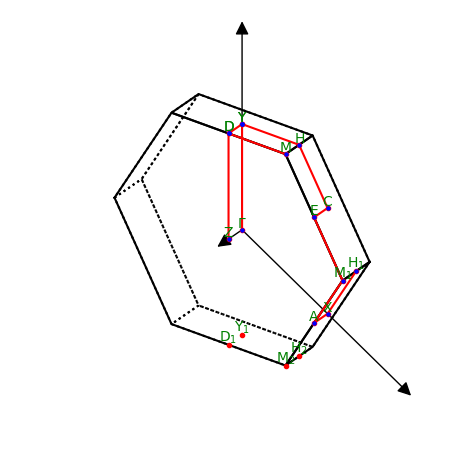

<Axes3DSubplot:>

In [4]:
# OK! Luckily ASE knows all about space groups and the reciprocal lattice.
# So let's ask it what it knows about this one, and a suggested high-symmetry path.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)

In [5]:
bs_calc = calc.fixed_density(kpts={'path': 'GNFILMXYZ', 'npoints': 100}, symmetry='off')
 # path through k-space taken from Materials project; or from analysis above

bs_calc.get_potential_energy() # eval at these k-point path
bs = bs_calc.band_structure().subtract_reference()
#bs=bs_calc.band_structure() # generate the plot object
#bs.ylabel(r'$\varepsilon_N(k)$ [eV]', size=24)
bs.plot(ylabel=r'$\mathrm{\varepsilon_N}$ [eV]', label=r'$\mathrm{WS_{2}-WSe_{2}}$', loc="upper right", color='r', emax=4, emin=-4)
plt.grid(which='major', axis='both', zorder=-1.0, color = 'green', linestyle = '--', linewidth = 0.05)
plt.tight_layout()
#plt.savefig('MoS2-MoS2.eps')
plt.show()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.0
 |___|_|             

User:   tewodros@tewodros-HP-Pavilion-Laptop-14-bf0xx
Date:   Sat May 17 04:09:37 2025
Arch:   x86_64
Pid:    7344
CWD:    /home/tewodros/Desktop/Hetrostructure/HTR/revised/HTR/1T_2H/WS2-WSe2
Python: 3.7.12
gpaw:   /home/tewodros/miniconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/tewodros/miniconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/tewodros/miniconda3/lib/python3.7/site-packages/ase (version 3.22.1)
numpy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/numpy (version 1.21.6)
scipy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/scipy (version 1.7.3)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: -20}
  gpts: [20 20 90]
  kpts: {npoints: 100,
         path: GNFILMXYZ}
  mode: {ecut: 600.0,
         name: pw}
  nbands: 7

KeyError: 'N'

In [ ]:
# Get the accurate HOMO and LUMO from the band structure calculator
KS_gap, p1, p2 = bandgap(bs_calc)
#KS_gap, homo, lumo = bs_calc.get_homo_lumo()

In [ ]:
KS_gap